## Assignment 3 Clustering Analysis 

#### Instructions:
- Download the **"sports_age.xlsx"** data set. 
- Using the k-means clustering analysis technique we learned from the "Clustering_Analysis_kmeans" Python script, identify the clusters and their profiles in this data set.

#### The following variables:
- TeamSports (Team sport package): a package that consists of channels that cove team sport events (e.g., football, basketball, etc.) <br> 
- FightSports (Fight sport package): a package that consists of channels that cover fight sport events (e.g., MMA, boxing, etc.)
- Age: participants age

#### Goal of segmentation:
1) To identify the optimal prices for different customer segments based on how much they value the two packages, and <br> 
2) Describe the customer segments based on age.

In [28]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

In [29]:
# load and read csv data set
df = pd.read_excel('sports_age-1.xlsx')
df.head()

#if you don't have your sports_age file saved in a separate folder called "data", then remove data/ in the command.

,FightSports,TeamSports,Age
0,12.5,31.0,52
1,4.0,34.0,53
2,14.5,18.0,21
3,17.5,19.5,29
4,17.5,38.0,25


In [30]:
#view variable information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FightSports  200 non-null    float64
 1   TeamSports   200 non-null    float64
 2   Age          200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [31]:
# view summary statistics
df.describe()

,FightSports,TeamSports,Age
count,200.000000,200.000000,200.000000
mean,11.942500,28.920000,35.680000
std,6.945259,7.352305,11.036604
min,1.500000,7.500000,9.000000
25%,6.000000,24.000000,28.000000
50%,10.250000,30.000000,35.000000
75%,17.500000,34.000000,40.250000
max,30.500000,48.500000,77.000000


### WAIT!
Because the goal is to segment customers based on how much they value the packages, we do not segment based on age. Therefore, we should remove age from segmentation. But we will use it to describe the segments later. 

In [32]:
#load data again, but remove age from the analysis
df = df[['FightSports','TeamSports']]
df

,FightSports,TeamSports
0,12.5,31.0
1,4.0,34.0
2,14.5,18.0
3,17.5,19.5
4,17.5,38.0
...,...,...
195,20.5,37.5
196,6.0,33.5
197,19.5,30.5
198,4.5,31.0


## K-means clustering

In [33]:
# For more information -> http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# let's start with four clusters
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)


In [34]:
# fit our data into k-means to prepare for clustering
k_means.fit(df)


C:\Users\brody\anaconda3\envs\data-fa22\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [35]:
#clustering results
k_means.labels_



array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0])

In [36]:
#cluster centroids or centers
k_means.cluster_centers_



array([[ 8.04365079, 33.03571429],
       [18.58108108, 21.91216216]])

In [37]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()


,cluster
0,0
1,0
2,1
3,1
4,0


In [38]:
# we can combine the cluster label into the original dataset. Now, the label is the 4th column in the new dataset
df2 = df.join(df1)
df2.head()



,FightSports,TeamSports,cluster
0,12.5,31.0,0
1,4.0,34.0,0
2,14.5,18.0,1
3,17.5,19.5,1
4,17.5,38.0,0


## Profiling each cluster

In [39]:
# group the clusters by their means
# look at the differences in the means across clusters
df2.groupby('cluster').mean()



,FightSports,TeamSports
cluster,,
0,8.043651,33.035714
1,18.581081,21.912162


### Profiling the clusters (non-normalized data)



# type your answer here
1. cluster 0: low FightSports value, very high TeamSports value
2. cluster 1: high FightSports value, high TeamSports value

## Normalizing your data
Hint: normalize your data and run a k-means = 2 again.

In [40]:
# load and read csv data set
df = pd.read_excel('sports_age-1.xlsx')
df.head()

,FightSports,TeamSports,Age
0,12.5,31.0,52
1,4.0,34.0,53
2,14.5,18.0,21
3,17.5,19.5,29
4,17.5,38.0,25


In [41]:
#load data again, but remove age from the analysis
df = df[['FightSports','TeamSports']]
df.head()

,FightSports,TeamSports
0,12.5,31.0
1,4.0,34.0
2,14.5,18.0
3,17.5,19.5
4,17.5,38.0


In [42]:
#normalize our data
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()


,FightSports,TeamSports
0,0.019224,0.050732
1,-0.273879,0.123902
2,0.088190,-0.266341
3,0.191638,-0.229756
4,0.191638,0.221463


In [43]:
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)

In [44]:
k_means.fit(df_norm)

C:\Users\brody\anaconda3\envs\data-fa22\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [45]:
k_means.labels_

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0])

In [46]:
k_means.cluster_centers_

array([[-0.20031609,  0.0858072 ],
       [ 0.221402  , -0.09483954]])

In [47]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,1
3,1
4,1


In [48]:
df2 = df_norm.join(df1)
df2.head()

,FightSports,TeamSports,cluster
0,0.019224,0.050732,0
1,-0.273879,0.123902,0
2,0.088190,-0.266341,1
3,0.191638,-0.229756,1
4,0.191638,0.221463,1


<AxesSubplot:>

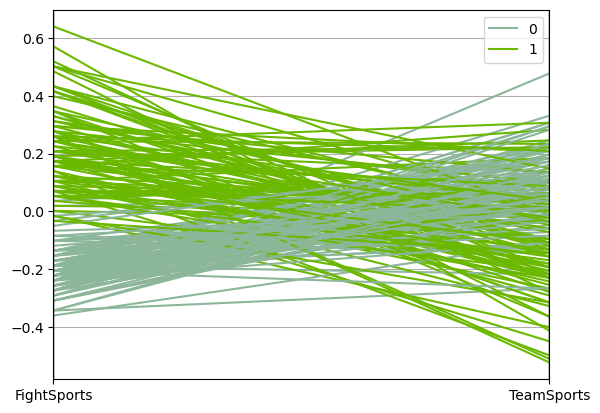

In [49]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df2, 'cluster')

## Profiling each cluster

In [50]:
# group the clusters by their means
# look at the differences in the means across clusters
df2.groupby(['cluster']).mean()

,FightSports,TeamSports
cluster,,
0,-0.200316,0.085807
1,0.221402,-0.094840


### Profiling the clusters (normalized data)

#type your answer here
1. cluster 0: very low FightSports value, high TeamSports value
2. cluster 1: very high FightSports value, low TeamSports value



In [51]:
#change the cluster values from 0 to 1 and 1 to 2
df2 = df2.replace({'cluster': {0: 1, 1: 2}})

### Based on the profiles, give title names for your clusters.

#type your answer here

#Cluster 1: Team sport enjoyers

#Cluster 2: Fight sport enjoyers



### Using the normalized data, how many people belong to each cluster?

In [52]:
#type your answer here
#Count of people in each cluster
df2.groupby(['cluster']).count()

#cluster 1:105 people
#cluster 2:95 people

,FightSports,TeamSports
cluster,,
1,105,105
2,95,95


In [53]:
#download the cluster outputs into an Excel 
df2.to_excel("Coyne_sports_age_frompython.xlsx")